In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

# image library in python
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

# cache_dir is where we store the output file, and '.' implies the current directory
# untar=True means unzip=True
data_dir = tf.keras.utils.get_file(
    'flower_photos',
    origin=dataset_url,
    cache_dir='/content/drive/MyDrive/Deeplearning, Keras and Tensorflow/',
    untar=True)


In [3]:
data_dir

'/content/drive/MyDrive/Deeplearning, Keras and Tensorflow/datasets/flower_photos'

In [4]:
# pathlib converts the path to OS specific file paths

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/Deeplearning, Keras and Tensorflow/datasets/flower_photos')

In [5]:
# gives the path of images that has an extension of .jpg
list(data_dir.glob('*/*.jpg'))

[PosixPath('/content/drive/MyDrive/Deeplearning, Keras and Tensorflow/datasets/flower_photos/sunflowers/3749091071_c146b33c74_n.jpg'),
 PosixPath('/content/drive/MyDrive/Deeplearning, Keras and Tensorflow/datasets/flower_photos/sunflowers/16616096711_12375a0260_n.jpg'),
 PosixPath('/content/drive/MyDrive/Deeplearning, Keras and Tensorflow/datasets/flower_photos/sunflowers/20406385204_469f6749e2_n.jpg'),
 PosixPath('/content/drive/MyDrive/Deeplearning, Keras and Tensorflow/datasets/flower_photos/sunflowers/7820305664_82148f3bfb_n.jpg'),
 PosixPath('/content/drive/MyDrive/Deeplearning, Keras and Tensorflow/datasets/flower_photos/sunflowers/15030133005_9728102622_z.jpg'),
 PosixPath('/content/drive/MyDrive/Deeplearning, Keras and Tensorflow/datasets/flower_photos/sunflowers/20407896403_a50fef58ac_n.jpg'),
 PosixPath('/content/drive/MyDrive/Deeplearning, Keras and Tensorflow/datasets/flower_photos/sunflowers/20410697750_c43973d1eb.jpg'),
 PosixPath('/content/drive/MyDrive/Deeplearning, Ker

In [6]:
# gives the path of images that has an extension of .jpg
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/content/drive/MyDrive/Deeplearning, Keras and Tensorflow/datasets/flower_photos/roses/7345657862_689366e79a.jpg'),
 PosixPath('/content/drive/MyDrive/Deeplearning, Keras and Tensorflow/datasets/flower_photos/roses/7409458444_0bfc9a0682_n.jpg'),
 PosixPath('/content/drive/MyDrive/Deeplearning, Keras and Tensorflow/datasets/flower_photos/roses/7551637034_55ae047756_n.jpg'),
 PosixPath('/content/drive/MyDrive/Deeplearning, Keras and Tensorflow/datasets/flower_photos/roses/9337528427_3d09b7012b.jpg'),
 PosixPath('/content/drive/MyDrive/Deeplearning, Keras and Tensorflow/datasets/flower_photos/roses/5736328472_8f25e6f6e7.jpg')]

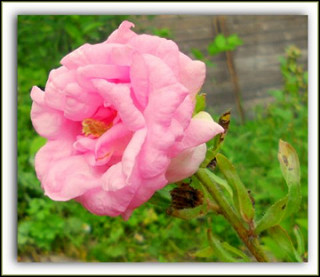

In [8]:
PIL.Image.open(roses[1])

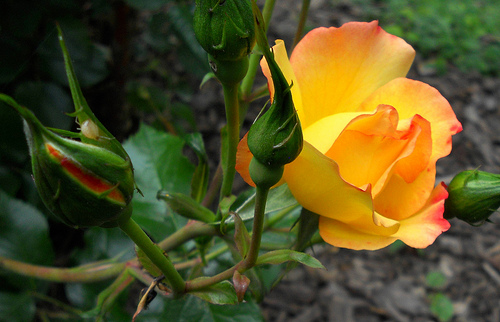

In [9]:
PIL.Image.open(roses[0])

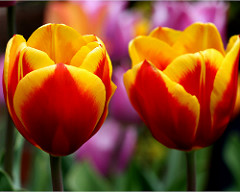

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tuplips/*'))
}

In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

OpenCV (Open Source Computer Vision Library) is a popular open-source computer vision and machine learning software library. It provides a wide range of functionalities for tasks such as image and video analysis, object detection and recognition, feature extraction, and more.

In [13]:
flowers_images_dict['roses']

[PosixPath('/content/drive/MyDrive/Deeplearning, Keras and Tensorflow/datasets/flower_photos/roses/7345657862_689366e79a.jpg'),
 PosixPath('/content/drive/MyDrive/Deeplearning, Keras and Tensorflow/datasets/flower_photos/roses/7409458444_0bfc9a0682_n.jpg'),
 PosixPath('/content/drive/MyDrive/Deeplearning, Keras and Tensorflow/datasets/flower_photos/roses/7551637034_55ae047756_n.jpg'),
 PosixPath('/content/drive/MyDrive/Deeplearning, Keras and Tensorflow/datasets/flower_photos/roses/9337528427_3d09b7012b.jpg'),
 PosixPath('/content/drive/MyDrive/Deeplearning, Keras and Tensorflow/datasets/flower_photos/roses/5736328472_8f25e6f6e7.jpg'),
 PosixPath('/content/drive/MyDrive/Deeplearning, Keras and Tensorflow/datasets/flower_photos/roses/3500121696_5b6a69effb_n.jpg'),
 PosixPath('/content/drive/MyDrive/Deeplearning, Keras and Tensorflow/datasets/flower_photos/roses/3903276582_fe05bf84c7_n.jpg'),
 PosixPath('/content/drive/MyDrive/Deeplearning, Keras and Tensorflow/datasets/flower_photos/ros

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

array([[[  0,   3,   1],
        [  1,   4,   2],
        [  0,   2,   0],
        ...,
        [ 48,  90,  55],
        [ 46,  93,  54],
        [ 47,  97,  55]],

       [[  3,   6,   4],
        [  2,   5,   3],
        [  3,   6,   4],
        ...,
        [ 48,  96,  54],
        [ 49,  99,  57],
        [ 49, 102,  58]],

       [[  1,   4,   2],
        [  0,   2,   0],
        [  4,   7,   5],
        ...,
        [ 52,  99,  61],
        [ 53, 101,  65],
        [ 51, 102,  65]],

       ...,

       [[ 31,  44,  28],
        [ 26,  43,  29],
        [ 20,  39,  24],
        ...,
        [ 71,  83,  89],
        [ 69,  77,  77],
        [ 65,  63,  63]],

       [[ 21,  36,  22],
        [ 15,  36,  21],
        [ 21,  39,  22],
        ...,
        [ 77,  80,  88],
        [ 69,  72,  77],
        [ 58,  62,  63]],

       [[ 17,  33,  16],
        [ 12,  34,  15],
        [ 17,  36,  15],
        ...,
        [ 75,  78,  86],
        [ 68,  71,  76],
        [ 56,  60,  61]]], dtype=uint8)
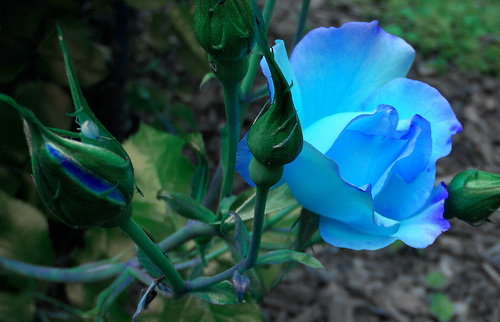

In [15]:
img
# opencv read the image and converted it into 3D numpy array

In [16]:
img.shape

(322, 500, 3)

In [17]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [18]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))

    # resize because ML model expects all the images to be in one size
    resized_img = cv2.resize(img, (180, 180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [19]:
X = np.array(X)
y = np.array(y)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [22]:
num_classes = 5

model = Sequential([
    # 16 -> 16 filters
    # 3 -> each 3 by 3 filter
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Dense layer accepts only 1 D array, so let's flatten the array
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)

])

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy']
             )

model.fit(X_train_scaled, y_train, epochs=15)

Epoch 1/15
68/68 [==============================] - 67s 954ms/step - loss: 1.0483 - accuracy: 0.5379
Epoch 2/15
68/68 [==============================] - 62s 911ms/step - loss: 0.7440 - accuracy: 0.7199
Epoch 3/15
68/68 [==============================] - 62s 912ms/step - loss: 0.5763 - accuracy: 0.7850
Epoch 4/15
68/68 [==============================] - 63s 936ms/step - loss: 0.3899 - accuracy: 0.8551
Epoch 5/15
68/68 [==============================] - 64s 939ms/step - loss: 0.2524 - accuracy: 0.9122
Epoch 6/15
68/68 [==============================] - 63s 926ms/step - loss: 0.1766 - accuracy: 0.9484
Epoch 7/15
68/68 [==============================] - 65s 942ms/step - loss: 0.1280 - accuracy: 0.9545
Epoch 8/15
68/68 [==============================] - 64s 936ms/step - loss: 0.0455 - accuracy: 0.9898
Epoch 9/15
68/68 [==============================] - 64s 940ms/step - loss: 0.0452 - accuracy: 0.9884
Epoch 10/15
68/68 [==============================] - 70s 1s/step - loss: 0.0714 - accuracy:

In [23]:
model.evaluate(X_test_scaled, y_test)

23/23 [==============================] - 7s 249ms/step - loss: 1.4472 - accuracy: 0.7632


[1.4471535682678223, 0.7632312178611755]

In [24]:
predictions = model.predict(X_test_scaled)
predictions

23/23 [==============================] - 7s 318ms/step


array([[  3.5479527,  13.349008 ,  -1.0233355,  -3.4140534, -19.67064  ],
       [  6.7140765,  -5.104154 ,  -7.0036583,   9.232071 , -29.900995 ],
       [  3.572732 ,   5.8993444,   6.2926345,  -4.059716 , -17.747671 ],
       ...,
       [ -4.3968263,   3.1930883,  18.421904 ,  -6.5389204, -12.600625 ],
       [  4.1404557,   8.36619  ,  -4.030075 ,   2.520988 , -24.053251 ],
       [ -2.2824125,  18.937805 ,   7.442064 ,  -4.626589 , -28.603865 ]],
      dtype=float32)

In [25]:
# softmax converts numpy array into set of probabilities

score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([5.5390028e-05, 9.9994397e-01, 5.7298911e-07, 5.2465108e-08,
       4.5679792e-15], dtype=float32)>

In [26]:
np.argmax(score)

1

In [27]:
y_test[0]

1

In [29]:
# 0.3 is the zoom percentage for the image

data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
])

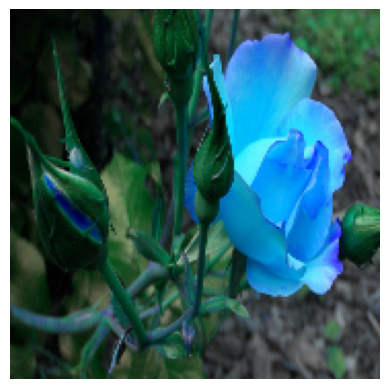

In [30]:
# plt.axis('off') is a command that turns off the axis lines and labels in a plot.

plt.axis('off')
plt.imshow(X[0])

In [31]:
# data_augmentation expects a 2D array

data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[ 28.561842 ,  37.06949  ,  24.069492 ],
        [ 21.568155 ,  46.183937 ,  30.447115 ],
        [  4.3547783,  70.90617  ,  37.92299  ],
        ...,
        [ 46.341057 ,  89.453995 ,  54.38844  ],
        [ 62.106464 ,  95.42291  ,  62.617203 ],
        [ 56.589024 ,  99.48184  ,  59.34166  ]],

       [[ 26.573391 ,  33.948704 ,  22.098036 ],
        [ 24.053833 ,  42.360573 ,  29.946167 ],
        [  2.1456504,  67.07213  ,  40.18092  ],
        ...,
        [ 51.929543 , 101.5924   ,  56.61843  ],
        [ 67.96437  , 100.923584 ,  64.47356  ],
        [ 62.473953 , 106.47859  ,  64.983315 ]],

       [[ 25.87794  ,  31.850183 ,  20.322706 ],
        [ 26.535505 ,  40.41777  ,  29.046951 ],
        [ 23.106754 ,  75.13846  ,  53.237663 ],
        ...,
        [ 45.999996 ,  98.99162  ,  56.158737 ],
        [ 61.80381  ,  97.720795 ,  61.81391  ],
        [ 66.34426  , 102.75309  ,  63.792034 ]],

       ...,

     

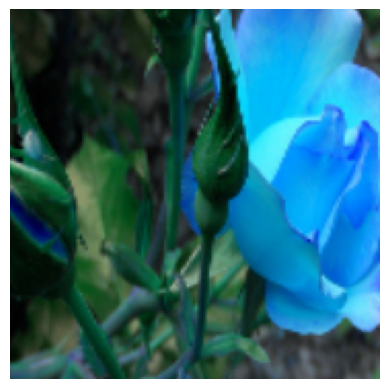

In [32]:
plt.axis('off')

# we need to convert the param from tensor to numpy array
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

Random Contrast

In [33]:
data_augmentation_contrast = keras.Sequential({
    layers.experimental.preprocessing.RandomContrast(0.9),
})

TypeError: The added layer must be an instance of class Layer. Received: layer={<keras.src.layers.preprocessing.image_preprocessing.RandomContrast object at 0x7d5f301b5480>} of type <class 'set'>.

In [ ]:
plt.axis('off')
plt.imshow(X[0])

In [ ]:
data_augmentation_contrast(X)[0]

Rotation

In [ ]:
data_augmentation_rotation = keras.Sequential([
    layers.experimentai.preprocessing.RandomRotation(0.2)
])

In [ ]:
data_augmentation_rotation(X)[0]

Using multiple transformations

In [ ]:
mul_data_augmentaion = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(
        "horizontal",
        input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotations(0.1),
    layers.experimental.preprocessing.Randomzoom(0.1)
])

In [ ]:
num_classes = 5

model = Sequential([
    mul_data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # going to drop 20% of neurons in each layer at random
    # for better generalization
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, acitivation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossestropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=15)

In [ ]:
model.evaluate(X_test_scaled, y_test)